<a href="https://colab.research.google.com/github/SaiRaghavTelugu/SaiRaghav_RideWise/blob/main/AI_RideWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

day = pd.read_csv("/content/drive/MyDrive/day.csv")
hour = pd.read_csv("/content/drive/MyDrive/hour.csv")

In [ ]:
print(day.head())
print(hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [ ]:
print(day.info())
print(hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [ ]:
print(day.describe())
print(day.isnull().sum())
print(hour.describe())
print(hour.isnull().sum())


          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

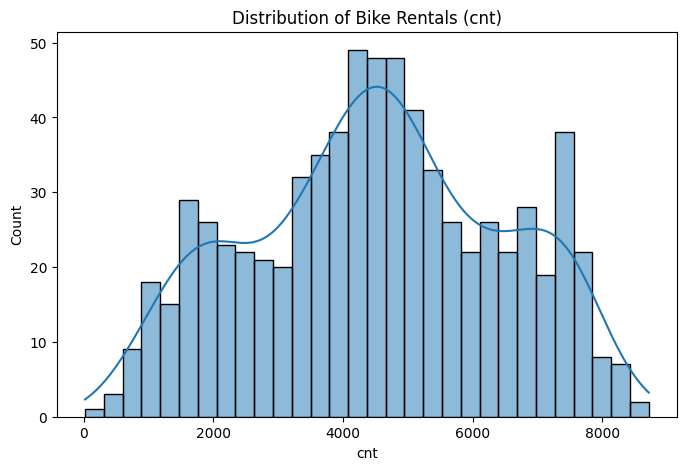

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(day['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals (cnt)")
plt.show()



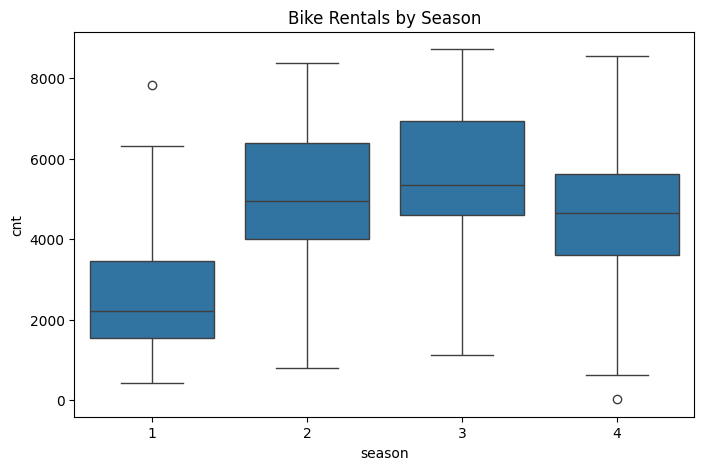

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='cnt', data=day)
plt.title("Bike Rentals by Season")
plt.show()


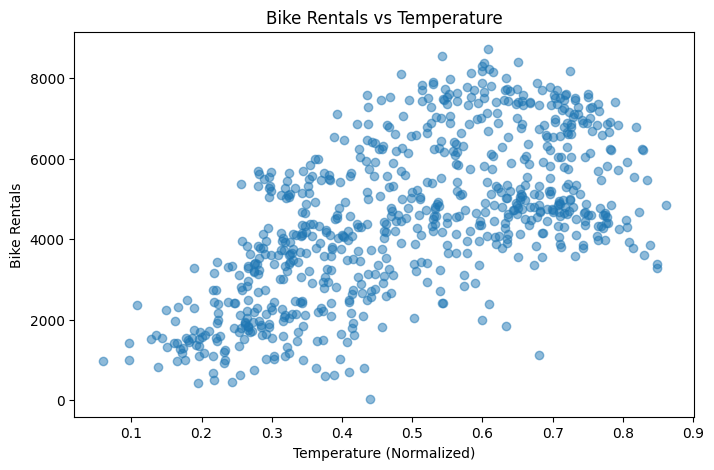

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(day['temp'], day['cnt'], alpha=0.5)
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Bike Rentals")
plt.title("Bike Rentals vs Temperature")
plt.show()



In [ ]:
day['dteday'] = pd.to_datetime(day['dteday'])
day['year'] = day['dteday'].dt.year
day['month'] =day['dteday'].dt.month
day['day'] = day['dteday'].dt.day
day = day.sort_values('dteday')  # sort by date



In [ ]:
print(day.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  year  month  day  
0   985  2011      1    1  
1   801  2011      1    2  
2  1349 

In [ ]:
day['is_weekend'] = day['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

In [ ]:
day['is_holiday_or_weekend'] = day['holiday'] | day['is_weekend']

In [ ]:
day_model = day.drop(['instant','dteday','casual','registered'], axis=1)

In [ ]:
import pandas as pd

day_encoded = pd.get_dummies(
    day_model,
    columns=['season','weathersit','weekday','month'],
)

day_encoded.head()


,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,year,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,1,0,0,0.344167,0.363625,0.805833,0.160446,985,2011,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,801,2011,...,False,False,False,False,False,False,False,False,False,False
2,0,1,0,1,0.196364,0.189405,0.437273,0.248309,1349,2011,...,False,False,False,False,False,False,False,False,False,False
3,0,1,0,1,0.200000,0.212122,0.590435,0.160296,1562,2011,...,False,False,False,False,False,False,False,False,False,False
4,0,1,0,1,0.226957,0.229270,0.436957,0.186900,1600,2011,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np

day_encoded['month_sin'] = np.sin(2 * np.pi * day['month']/12)
day_encoded['month_cos'] = np.cos(2 * np.pi * day['month']/12)

day_encoded['weekday_sin'] = np.sin(2 * np.pi * day['weekday']/7)
day_encoded['weekday_cos'] = np.cos(2 * np.pi * day['weekday']/7)


In [ ]:
day_encoded['temp2'] = day['temp']**2
day_encoded['hum2'] = day['hum']**2


In [ ]:
day_encoded['cnt_lag1'] = day['cnt'].shift(1)   # yesterday
day_encoded['cnt_lag7'] = day['cnt'].shift(7)   # last week same day
day_encoded = day_encoded.dropna()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming day_encoded is already created and contains the features and target
# Split data into features (X) and target (y) for random split
X_random = day_encoded.drop('cnt', axis=1)
y_random = day_encoded['cnt']

# random split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

lr_random = LinearRegression()
lr_random.fit(X_train_r, y_train_r)
y_pred_r = lr_random.predict(X_test_r)

mae_r  = mean_absolute_error(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2_r   = r2_score(y_test_r, y_pred_r)

print("Random Split Model")
print(f"MAE: {mae_r:.2f}, RMSE: {rmse_r:.2f}, R²: {r2_r:.3f}")


Random Split Model
MAE: 466.45, RMSE: 627.80, R²: 0.877


In [ ]:
# Determine the cutoff point based on the length of the day_encoded DataFrame after dropping rows
cutoff = int(len(day_encoded) * 0.8)  # 80% mark

# Get the indices for the train and test sets based on the day_encoded index
train_idx = day_encoded.index[:cutoff]
test_idx  = day_encoded.index[cutoff:]

In [ ]:
X_train = day_encoded.loc[train_idx].drop('cnt', axis=1)
y_train = day_encoded.loc[train_idx, 'cnt']

X_test  = day_encoded.loc[test_idx].drop('cnt', axis=1)
y_test  = day_encoded.loc[test_idx, 'cnt']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)


print("Linear Regression (time-aware split):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

Linear Regression (time-aware split):
MAE: 667.89
RMSE: 917.78
R²: 0.761


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
ridge = Ridge(alpha=4.0)   # alpha controls penalty strength
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression (time-aware split)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


Ridge Regression (time-aware split)
MAE: 711.72
RMSE: 994.01
R²: 0.720


In [ ]:
lasso = Lasso(alpha=0.01, max_iter=10000)  # need more iterations sometimes
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression (time-aware split)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


Lasso Regression (time-aware split)
MAE: 667.10
RMSE: 916.99
R²: 0.762


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.527e+07, tolerance: 1.830e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Start fresh from 'day' dataset
day_tree = day.copy().sort_values('dteday').reset_index(drop=True)

# Lag features (keep only the useful ones)
day_tree['cnt_lag1'] = day_tree['cnt'].shift(1)
day_tree['cnt_lag7'] = day_tree['cnt'].shift(7)

# Rolling features
day_tree['cnt_roll7']  = day_tree['cnt'].shift(1).rolling(7).mean()
day_tree['cnt_roll14'] = day_tree['cnt'].shift(1).rolling(14).mean()
day_tree['cnt_roll30'] = day_tree['cnt'].shift(1).rolling(30).mean()
day_tree['cnt_roll60'] = day_tree['cnt'].shift(1).rolling(60).mean()

# Expanding mean (global average up to yesterday)
day_tree['cnt_expanding'] = day_tree['cnt'].shift(1).expanding().mean()

# Drop NaNs (first 60 days due to rolling)
day_tree = day_tree.dropna().reset_index(drop=True)

# One-hot encode categoricals
day_tree = pd.get_dummies(day_tree, columns=['season','weathersit','weekday','mnth'], drop_first=True)

# Define X and y
X_tree = day_tree.drop(['instant','dteday','casual','registered','cnt'], axis=1)
y_tree = day_tree['cnt']




In [ ]:
cutoff = int(len(X_tree) * 0.8)
X_train, X_test = X_tree.iloc[:cutoff], X_tree.iloc[cutoff:]
y_train, y_test = y_tree.iloc[:cutoff], y_tree.iloc[cutoff:]



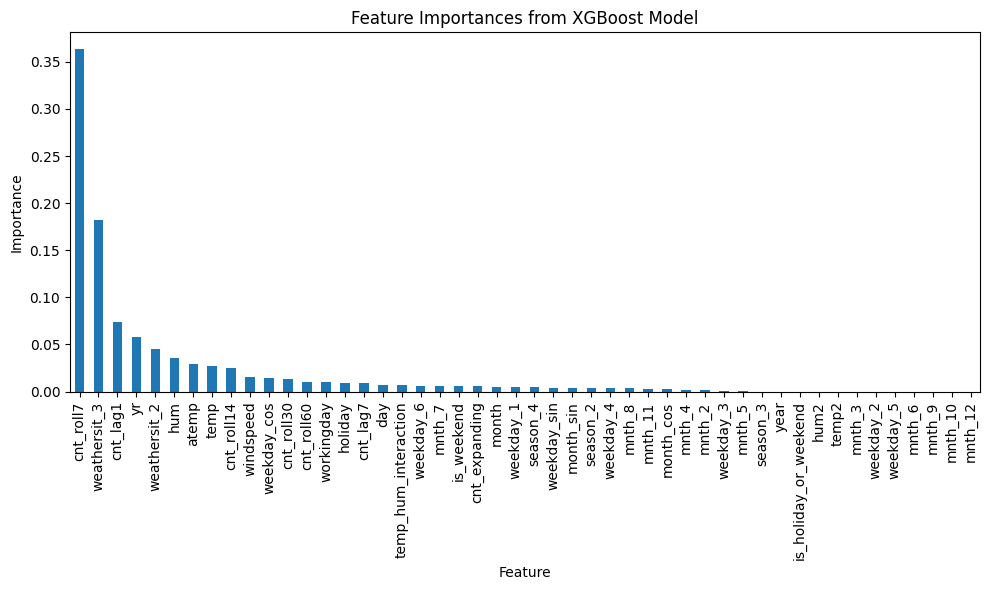

Removing features with importance below 0.005: ['month', 'weekday_1', 'season_4', 'weekday_sin', 'month_sin', 'season_2', 'weekday_4', 'mnth_8', 'mnth_11', 'month_cos', 'mnth_4', 'mnth_2', 'weekday_3', 'mnth_5', 'season_3', 'year', 'is_holiday_or_weekend', 'hum2', 'temp2', 'mnth_3', 'weekday_2', 'weekday_5', 'mnth_6', 'mnth_9', 'mnth_10', 'mnth_12']
Quick R² (random split) after feature selection: 0.8881224393844604


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Base engineered dataset ---
day_tree = day.copy().sort_values('dteday').reset_index(drop=True)

# --- 2. Lag features (time-based) ---
day_tree['cnt_lag1'] = day_tree['cnt'].shift(1)
day_tree['cnt_lag7'] = day_tree['cnt'].shift(7)

# --- 3. Rolling features (time-based) ---
day_tree['cnt_roll7']  = day_tree['cnt'].shift(1).rolling(7).mean()
day_tree['cnt_roll14'] = day_tree['cnt'].shift(1).rolling(14).mean()
day_tree['cnt_roll30'] = day_tree['cnt'].shift(1).rolling(30).mean()
day_tree['cnt_roll60'] = day_tree['cnt'].shift(1).rolling(60).mean()

# --- 4. Expanding mean (time-based) ---
day_tree['cnt_expanding'] = day_tree['cnt'].shift(1).expanding().mean()

# --- 5. Add new features (before dropna) ---
day_tree['temp2'] = day_tree['temp']**2
day_tree['hum2'] = day_tree['hum']**2
day_tree['is_weekend'] = day_tree['weekday'].isin([0,6]).astype(int)
day_tree['is_holiday_or_weekend'] = day_tree['holiday'] | day_tree['is_weekend']
day_tree['month_sin'] = np.sin(2 * np.pi * day_tree['mnth']/12)
day_tree['month_cos'] = np.cos(2 * np.pi * day_tree['mnth']/12)
day_tree['weekday_sin'] = np.sin(2 * np.pi * day_tree['weekday']/7)
day_tree['weekday_cos'] = np.cos(2 * np.pi * day_tree['weekday']/7)
day_tree['temp_hum_interaction'] = day_tree['temp'] * day_tree['hum']


# --- 6. Drop NaNs after creating lag/rolling features ---
day_tree = day_tree.dropna().reset_index(drop=True)

# --- 7. One-hot encode categorical variables ---
day_tree = pd.get_dummies(day_tree, columns=['season','weathersit','weekday','mnth'], drop_first=True)

# --- 8. Define X and y ---
X = day_tree.drop(['instant','dteday','casual','registered','cnt'], axis=1)
y = day_tree['cnt']

# --- 9. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 10. XGBoost model (initial train for feature importance) ---
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

# --- 11. Train ---
model.fit(X_train, y_train)

# --- 12. Get and sort feature importances ---
feature_importances = model.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title("Feature Importances from XGBoost Model")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


# --- 13. Feature Selection (remove features below a threshold) ---
importance_threshold = 0.005
low_importance_features = sorted_feature_importances[sorted_feature_importances < importance_threshold].index.tolist()
print(f"Removing features with importance below {importance_threshold}: {low_importance_features}")
X = X.drop(columns=low_importance_features, errors='ignore')

# --- 14. Re-split data with selected features ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 15. Retrain XGBoost model with selected features ---
model_selected_features = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)
model_selected_features.fit(X_train, y_train)

# --- 16. Predict and evaluate ---
y_pred = model_selected_features.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Quick R² (random split) after feature selection:", r2)

Feature Importances:
cnt_roll7               0.338856
weathersit_3            0.205610
yr                      0.078077
cnt_lag1                0.075805
weathersit_2            0.046190
hum                     0.037595
temp                    0.032331
atemp                   0.030066
cnt_roll14              0.029311
cnt_roll30              0.015010
windspeed               0.014360
workingday              0.010944
weekday_cos             0.010818
cnt_roll60              0.009732
weekday_6               0.009516
is_weekend              0.009471
cnt_lag7                0.009263
holiday                 0.008722
day                     0.007780
mnth_7                  0.007102
temp_hum_interaction    0.006813
cnt_expanding           0.006627
dtype: float32


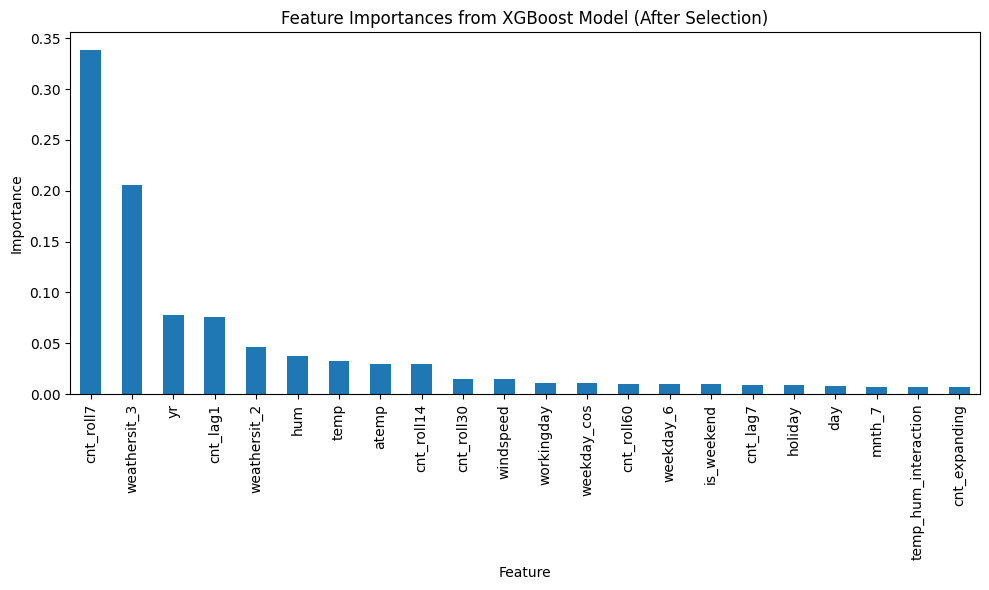

In [ ]:
# Get feature importances from the trained XGBoost model
# Use the model trained on the feature-selected data
feature_importances = model_selected_features.feature_importances_

# Create a pandas Series for better visualization
# Use the X_train with selected features
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(sorted_feature_importances)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title("Feature Importances from XGBoost Model (After Selection)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Random Forest
rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R²:", r2_score(y_test, rf_pred))

# XGBoost
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.05, max_depth=5,
                   subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("\nXGBoost:")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("R²:", r2_score(y_test, xgb_pred))



Random Forest:
MAE: 450.52189540507027
RMSE: 572.9090334099583
R²: 0.8821418221862243

XGBoost:
MAE: 406.13079833984375
RMSE: 521.9435134667352
R²: 0.9021782875061035


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# random split (80% train, 20% test)
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train XGBoost with your tuned params
xgb_rs = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.9,
    min_child_weight=5,
    gamma=0.1,
    random_state=42,
    n_jobs=-1
)

xgb_rs.fit(X_train_rs, y_train_rs)

# evaluate
y_pred_rs = xgb_rs.predict(X_test_rs)
mae_rs  = mean_absolute_error(y_test_rs, y_pred_rs)
rmse_rs = np.sqrt(mean_squared_error(y_test_rs, y_pred_rs))
r2_rs   = r2_score(y_test_rs, y_pred_rs)

print("\nXGBoost (random split):")
print(f"MAE: {mae_rs:.2f}, RMSE: {rmse_rs:.2f}, R²: {r2_rs:.3f}")



XGBoost (random split):
MAE: 403.23, RMSE: 524.51, R²: 0.901


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Start fresh from 'day' dataset
day_tree = day.copy().sort_values('dteday').reset_index(drop=True)

# Lag features (keep only the useful ones)
day_tree['cnt_lag1'] = day_tree['cnt'].shift(1)
day_tree['cnt_lag7'] = day_tree['cnt'].shift(7)

# Rolling features
day_tree['cnt_roll7']  = day_tree['cnt'].shift(1).rolling(7).mean()
day_tree['cnt_roll14'] = day_tree['cnt'].shift(1).rolling(14).mean()
day_tree['cnt_roll30'] = day_tree['cnt'].shift(1).rolling(30).mean()
day_tree['cnt_roll60'] = day_tree['cnt'].shift(1).rolling(60).mean()

# Expanding mean (global average up to yesterday)
day_tree['cnt_expanding'] = day_tree['cnt'].shift(1).expanding().mean()

# Drop NaNs (first 60 days due to rolling)
day_tree = day_tree.dropna().reset_index(drop=True)

# One-hot encode categoricals
day_tree = pd.get_dummies(day_tree, columns=['season','weathersit','weekday','mnth'], drop_first=True)

# Define X and y
X = day_tree.drop(['instant','dteday','casual','registered','cnt'], axis=1)
y = day_tree['cnt']


# random split (80% train, 20% test)
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(
    X, y, test_size=0.2, random_state=42
)


param_dist = {
    'n_estimators': [500, 800, 1200, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.5]
}

xgb_rs_tune = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

rand_search = RandomizedSearchCV(
    estimator=xgb_rs_tune,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train_rs, y_train_rs)
print("Best params:", rand_search.best_params_)
print("Best CV R²:", rand_search.best_score_)

# retrain with best params
best_model = rand_search.best_estimator_
y_pred_best = best_model.predict(X_test_rs)
print("Test R²:", r2_score(y_test_rs, y_pred_best))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 0.8, 'n_estimators': 1200, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV R²: 0.8430371284484863
Test R²: 0.9057906270027161


In [ ]:
!pip install lightgbm

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train LightGBM model
lgbm = LGBMRegressor(
    n_estimators=1000,     # number of trees
    learning_rate=0.05,    # smaller → more accurate, but slower
    max_depth=-1,          # -1 means no limit
    subsample=0.8,         # randomly sample rows
    colsample_bytree=0.8,  # randomly sample features
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train_rs, y_train_rs)

# Predictions
y_pred_lgbm = lgbm.predict(X_test_rs)

# Evaluation
mae_lgbm  = mean_absolute_error(y_test_rs, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test_rs, y_pred_lgbm))
r2_lgbm   = r2_score(y_test_rs, y_pred_lgbm)

print("LightGBM (random split):")
print(f"MAE: {mae_lgbm:.2f}, RMSE: {rmse_lgbm:.2f}, R²: {r2_lgbm:.3f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 39
[LightGBM] [Info] Start training from score 4805.675373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---- Time-aware split ----
cutoff = int(len(X) * 0.8)   # first 80% train, last 20% test
X_train_ta, X_test_ta = X.iloc[:cutoff], X.iloc[cutoff:]
y_train_ta, y_test_ta = y.iloc[:cutoff], y.iloc[cutoff:]

# ---- LightGBM model ----
lgbm_ta = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train
lgbm_ta.fit(X_train_ta, y_train_ta)

# Predict
y_pred_ta = lgbm_ta.predict(X_test_ta)

# Evaluate
mae_ta  = mean_absolute_error(y_test_ta, y_pred_ta)
rmse_ta = np.sqrt(mean_squared_error(y_test_ta, y_pred_ta))
r2_ta   = r2_score(y_test_ta, y_pred_ta)

print("LightGBM (time-aware split):")
print(f"MAE: {mae_ta:.2f}, RMSE: {rmse_ta:.2f}, R²: {r2_ta:.3f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 39
[LightGBM] [Info] Start training from score 4518.285448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
from sklearn.model_selection import GridSearchCV

# Base model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Use RandomizedSearch best params as center, search narrowly around them
param_grid_random = {
    'n_estimators': [1100, 1200, 1300],
    'learning_rate': [0.008, 0.01, 0.02],
    'max_depth': [3, 4, 5],
    'subsample': [0.75, 0.8, 0.85],
    'colsample_bytree': [0.75, 0.8, 0.85],
    'min_child_weight': [5, 7]
}

grid_search_random = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_random,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_random.fit(X_train_rs, y_train_rs)

print("Random Split → Best Grid Params:", grid_search_random.best_params_)
print("Random Split → Best Grid CV R²:", grid_search_random.best_score_)

best_random_grid_model = grid_search_random.best_estimator_
y_pred_grid_random = best_random_grid_model.predict(X_test_rs)

print("Random Split → Test MAE:", mean_absolute_error(y_test_rs, y_pred_grid_random))
print("Random Split → Test RMSE:", np.sqrt(mean_squared_error(y_test_rs, y_pred_grid_random)))
print("Random Split → Test R²:", r2_score(y_test_rs, y_pred_grid_random))


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Random Split → Best Grid Params: {'colsample_bytree': 0.75, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 1300, 'subsample': 0.8}
Random Split → Best Grid CV R²: 0.8454204003016154
Random Split → Test MAE: 399.4869079589844
Random Split → Test RMSE: 521.2031153974427
Random Split → Test R²: 0.9024555683135986


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- 1. Prepare data ---
day_tree = day.copy().sort_values('dteday').reset_index(drop=True)

# Lag features
day_tree['cnt_lag1'] = day_tree['cnt'].shift(1)
day_tree['cnt_lag7'] = day_tree['cnt'].shift(7)

# Rolling features
day_tree['cnt_roll7']  = day_tree['cnt'].shift(1).rolling(7).mean()
day_tree['cnt_roll14'] = day_tree['cnt'].shift(1).rolling(14).mean()
day_tree['cnt_roll30'] = day_tree['cnt'].shift(1).rolling(30).mean()
day_tree['cnt_roll60'] = day_tree['cnt'].shift(1).rolling(60).mean()

# Expanding mean
day_tree['cnt_expanding'] = day_tree['cnt'].shift(1).expanding().mean()

# Drop NaNs
day_tree = day_tree.dropna().reset_index(drop=True)

# One-hot encode categoricals
day_tree = pd.get_dummies(day_tree, columns=['season','weathersit','weekday','mnth'], drop_first=True)

# Define X and y
X = day_tree.drop(['instant','dteday','casual','registered','cnt'], axis=1)
y = day_tree['cnt']

# --- 2. Time-aware split (80% train, 20% test) ---
cutoff = int(len(X) * 0.8)
X_train, X_test = X.iloc[:cutoff], X.iloc[cutoff:]
y_train, y_test = y.iloc[:cutoff], y.iloc[cutoff:]

# --- 3. Hyperparameter search space ---
param_dist = {
    'n_estimators': [500, 800, 1200, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# --- 4. RandomizedSearchCV ---
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

rand_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,   # CV still happens within training set only
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)

print("Best params:", rand_search.best_params_)
print("Best CV R²:", rand_search.best_score_)

# --- 5. Evaluate on time-aware test set ---
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R²:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV R²: -0.2883975903193156
Test MAE: 699.4008178710938
Test RMSE: 945.0157736778789
Test R²: 0.7568970322608948


In [ ]:
# Use RandomizedSearch best params as center, search narrowly around them
param_grid_time = {
    'n_estimators': [700, 800, 900],
    'learning_rate': [0.15, 0.2, 0.25],
    'max_depth': [2, 3, 4],
    'subsample': [0.75, 0.8, 0.85],
    'colsample_bytree': [0.75, 0.8, 0.85],
    'min_child_weight': [3, 5]
}

grid_search_time = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_time,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_time.fit(X_train, y_train)

print("Time-Aware Split → Best Grid Params:", grid_search_time.best_params_)
print("Time-Aware Split → Best Grid CV R²:", grid_search_time.best_score_)

best_time_grid_model = grid_search_time.best_estimator_
y_pred_grid_time = best_time_grid_model.predict(X_test)

print("Time-Aware Split → Test MAE:", mean_absolute_error(y_test, y_pred_grid_time))
print("Time-Aware Split → Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_grid_time)))
print("Time-Aware Split → Test R²:", r2_score(y_test, y_pred_grid_time))


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Time-Aware Split → Best Grid Params: {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 700, 'subsample': 0.75}
Time-Aware Split → Best Grid CV R²: -0.24535757303237915
Time-Aware Split → Test MAE: 731.3117065429688
Time-Aware Split → Test RMSE: 993.1960091039432
Time-Aware Split → Test R²: 0.7314766645431519


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Parameter space for LightGBM
param_dist = {
    'n_estimators': [500, 800, 1000, 1200, 1500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [-1, 3, 4, 5, 6, 7],   # -1 = no limit
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [10, 20, 30, 40]
}

# Base model
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,             # number of parameter sets to try
    scoring='r2',
    cv=3,                  # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on RANDOM split
rand_search.fit(X_train_rs, y_train_rs)

# Best parameters
print("Best params:", rand_search.best_params_)
print("Best CV R²:", rand_search.best_score_)

# Retrain best model on full training set
best_params = rand_search.best_params_
final_lgbm = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)

final_lgbm.fit(X_train_rs, y_train_rs)

# Predictions on test set
y_pred_final = final_lgbm.predict(X_test_rs)

# Final evaluation
mae_final  = mean_absolute_error(y_test_rs, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_rs, y_pred_final))
r2_final   = r2_score(y_test_rs, y_pred_final)

print("\nFinal LightGBM Performance (Random Split):")
print(f"MAE: {mae_final:.2f}")
print(f"RMSE: {rmse_final:.2f}")
print(f"R²: {r2_final:.3f}")



Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2071
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 41
[LightGBM] [Info] Start training from score 4805.675373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -